## run this cell before starting spark cluster connection (corrects module error)

In [82]:
import os
print os.environ['PYSPARK_PYTHON']
os.environ['PYSPARK_PYTHON']=os.environ['LCG_VIEW'] + '/bin/python'
print os.environ['PYSPARK_PYTHON']

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python


### Import necessary spark and python stuff

In [83]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [84]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### select the data

In [86]:
df = spark.read.json("/user/sprenner/training_official_april_hourly_proportion_prefetching.json")

In [ ]:
df.createOrReplaceTempView("april")

In [87]:
pd.set_option("display.max_rows",1900)
pd.set_option("display.max_colwidth", -1)

In [88]:
time_series = spark.sql("SELECT DISTINCT CONCAT(fileScope, ':', filename) AS did, hour, hits\
            FROM april \
            WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
            ORDER BY hour ASC")

time_series_pd = time_series.toPandas()

In [89]:
time_series_pd

did  \
0       data15_13TeV:DAOD_HIGG5D1.11568050._000284.pool.root.1    
1       data15_13TeV:DAOD_HIGG5D1.11568050._000292.pool.root.1    
2       data15_13TeV:DAOD_HIGG5D1.11568050._000293.pool.root.1    
3       mc16_13TeV:DAOD_HIGG5D1.12139571._000006.pool.root.1      
4       data15_13TeV:DAOD_HIGG5D1.11568050._000294.pool.root.1    
5       data15_13TeV:DAOD_HIGG5D1.11568050._000288.pool.root.1    
6       mc16_13TeV:DAOD_HIGG5D1.12139571._000005.pool.root.1      
7       data15_13TeV:DAOD_HIGG5D1.11568050._000291.pool.root.1    
8       data15_13TeV:DAOD_HIGG5D1.11568050._000289.pool.root.1    
9       data15_13TeV:DAOD_HIGG5D1.11568050._000286.pool.root.1    
10      data15_13TeV:DAOD_HIGG5D1.11568050._000283.pool.root.1    
11      data15_13TeV:DAOD_HIGG5D1.11568050._000285.pool.root.1    
12      data15_13TeV:DAOD_HIGG5D1.11568050._000290.pool.root.1    
13      data16_13TeV:DAOD_HIGG5D1.12610361._000044.pool.root.1    
14      data16_13TeV:DAOD_HIGG5D1.11571984._001455.pool.root.1    
15      data16_13TeV:DAOD_HIGG5D1.11571984._001456.pool.root.1    
16      data16_13TeV:DAOD_HIGG5D1.12610361._000048.pool.root.1    
17      data15_13TeV:DAOD_HIGG5D1.11568050._000287.pool.root.1    
18      data15_13TeV:DAOD_HIGG5D1.11568050._000282.pool.root.1    
19      mc16_13TeV:DAOD_HIGG5D1.12139571._000009.pool.root.1      
20      data15_13TeV:DAOD_HIGG5D1.11568050._000292.pool.root.1    
21      data17_13TeV:HIST_HLTMON.13559902._000001.pool.root.1     
22      data15_13TeV:DAOD_HIGG5D1.11568050._000296.pool.root.1    
23      data15_13TeV:DAOD_HIGG5D1.11568050._000297.pool.root.1    
24      data17_13TeV:HIST_HLTMON.13611227._000001.pool.root.1     
25      data15_13TeV:DAOD_HIGG5D1.11568050._000294.pool.root.1    
26      data16_13TeV:DAOD_HIGG5D1.12610361._000047.pool.root.1    
27      mc16_13TeV:DAOD_HIGG5D1.12139571._000007.pool.root.1      
28      data15_13TeV:DAOD_HIGG5D1.11568050._000293.pool.root.1    
29      data16_13TeV:DAOD_HIGG5D1.12610361._000048.pool.root.1    
30      data16_13TeV:DAOD_HIGG5D1.12610361._000049.pool.root.1    
31      data16_13TeV:DAOD_HIGG5D1.12610361._000050.pool.root.1    
32      data15_13TeV:DAOD_HIGG5D1.11568050._000298.pool.root.1    
33      data15_13TeV:DAOD_HIGG5D1.11568044._000001.pool.root.1    
34      data15_13TeV:DAOD_HIGG5D1.11568050._000295.pool.root.1    
35      data17_13TeV:NTUP_TRIGCOST.13611218._000049.pool.root.1   
36      data17_13TeV:NTUP_TRIGCOST.13611218._000029.pool.root.1   
37      data17_13TeV:NTUP_TRIGCOST.13611218._000038.pool.root.1   
38      data17_13TeV:NTUP_TRIGCOST.13611218._000053.pool.root.1   
39      data15_13TeV:DAOD_HIGG5D1.11568044._000002.pool.root.1    
40      data17_13TeV:NTUP_TRIGCOST.13611218._000010.pool.root.1   
41      data17_13TeV:NTUP_TRIGCOST.13611218._000007.pool.root.1   
42      data16_13TeV:DAOD_HIGG5D1.12610361._000053.pool.root.1    
43      data17_13TeV:NTUP_TRIGCOST.13611218._000039.pool.root.1   
44      data16_13TeV:DAOD_HIGG5D1.12610361._000045.pool.root.1    
45      data17_13TeV:NTUP_TRIGCOST.13611218._000033.pool.root.1   
46      data17_13TeV:NTUP_TRIGCOST.13611218._000011.pool.root.1   
47      data17_13TeV:NTUP_TRIGCOST.13611218._000030.pool.root.1   
48      data17_13TeV:NTUP_TRIGCOST.13611218._000034.pool.root.1   
49      data17_13TeV:NTUP_TRIGCOST.13611218._000032.pool.root.1   
50      data17_13TeV:NTUP_TRIGCOST.13611218._000016.pool.root.1   
51      data17_13TeV:NTUP_TRIGCOST.13611218._000014.pool.root.1   
52      data17_13TeV:NTUP_TRIGCOST.13611218._000040.pool.root.1   
53      data15_13TeV:DAOD_HIGG5D1.11568044._000004.pool.root.1    
54      data17_13TeV:NTUP_TRIGCOST.13611218._000012.pool.root.1   
55      data15_13TeV:DAOD_HIGG5D1.11568044._000006.pool.root.1    
56      data17_13TeV:NTUP_TRIGCOST.13611218._000036.pool.root.1   
57      data15_13TeV:DAOD_HIGG5D1.11568044._000003.pool.root.1    
58      data17_13TeV:NTUP_TRIGCOST.13611218._000020.pool.root.1   
59      data17_13TeV:NTUP_TRIGCOST.13611

In [90]:
time_series.createOrReplaceTempView("time_series")
spark.sql("SELECT DISTINCT did, SUM(hits) AS sum_hits\
            FROM time_series \
            GROUP BY did \
            ORDER BY sum_hits DESC").toPandas()

did  \
0       mc16_5TeV:DAOD_EGAM1.13695903._000004.pool.root.1                                                 
1       mc16_5TeV:DAOD_EGAM1.13695903._000006.pool.root.1                                                 
2       mc16_5TeV:DAOD_EGAM1.13695903._000002.pool.root.1                                                 
3       mc16_5TeV:DAOD_EGAM1.13695903._000005.pool.root.1                                                 
4       mc16_5TeV:DAOD_EGAM1.13695903._000003.pool.root.1                                                 
5       mc16_5TeV:DAOD_EGAM1.13695903._000001.pool.root.1                                                 
6       mc16_5TeV:DAOD_EGAM1.13695903._000008.pool.root.1                                                 
7       mc16_5TeV:DAOD_EGAM1.13695903._000010.pool.root.1                                                 
8       mc16_5TeV:DAOD_EGAM1.13695903._000009.pool.root.1                                                 
9       mc16_5TeV:DAOD_EGAM1.13695903._000007.pool.root.1                                                 
10      mc15_valid:EVNT.13449411._000221.pool.root.1                                                      
11      mc15_valid:EVNT.13449411._000203.pool.root.1                                                      
12      mc15_valid:EVNT.13449411._000225.pool.root.1                                                      
13      mc15_valid:EVNT.13449411._000054.pool.root.1                                                      
14      mc15_valid:EVNT.13449411._000215.pool.root.1                                                      
15      mc15_valid:EVNT.13449411._000042.pool.root.1                                                      
16      mc15_valid:EVNT.13449411._000047.pool.root.1                                                      
17      mc15_valid:EVNT.13449411._000043.pool.root.1                                                      
18      mc15_valid:EVNT.13449411._000220.pool.root.1                                                      
19      mc15_valid:EVNT.13449411._000223.pool.root.1                                                      
20      mc15_valid:EVNT.13449411._000211.pool.root.1                                                      
21      mc15_valid:EVNT.13449411._000038.pool.root.1                                                      
22      mc15_valid:EVNT.13449411._000222.pool.root.1                                                      
23      mc15_valid:EVNT.13449411._000209.pool.root.1                                                      
24      mc15_valid:EVNT.13449411._000036.pool.root.1                                                      
25      mc15_valid:EVNT.13449411._000212.pool.root.1                                                      
26      mc15_valid:EVNT.13449411._000210.pool.root.1                                                      
27      mc15_valid:EVNT.13449411._000050.pool.root.1                                                      
28      mc15_valid:EVNT.13449411._000226.pool.root.1                                                      
29      mc15_valid:EVNT.13449411._000207.pool.root.1                                                      
30      mc15_valid:EVNT.13449411._000172.pool.root.1                                                      
31      mc15_valid:EVNT.13449411._000174.pool.root.1                                                      
32      mc15_valid:EVNT.13449411._000183.pool.root.1                                                      
33      mc15_valid:EVNT.13449411._000167.pool.root.1                                                      
34      mc15_valid:EVNT.13449411._000170.pool.root.1                                                      
35      mc15_valid:EVNT.13449411._000181.pool.root.1                                                      
36      mc15_valid:EVNT.13449411._000162.pool.root.1                                                      
37      mc15_valid:EVNT.13449411._

In [91]:
top1 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_5TeV:DAOD_EGAM1.13695903._000004.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top1.plot(x='hour', y='hits')

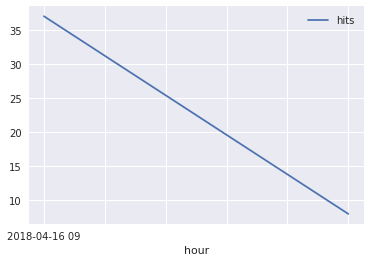

In [92]:
top1 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_5TeV:DAOD_EGAM1.13695903._000001.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top1.plot(x='hour', y='hits')

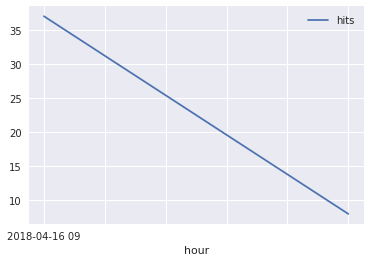

In [93]:
top2 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_5TeV:DAOD_EGAM1.13695903._000005.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top2.plot(x='hour', y='hits')

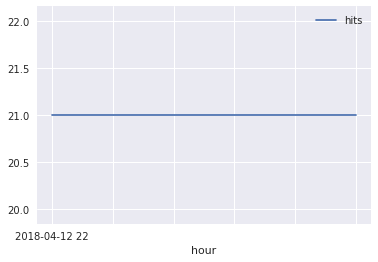

In [94]:
top3 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc15_valid:EVNT.13449411._000050.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top3.plot(x='hour', y='hits')

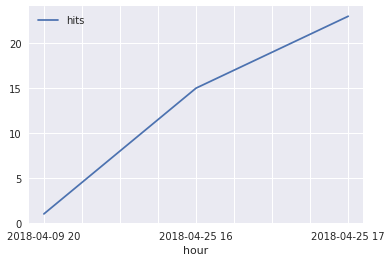

In [95]:
top4 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:NTUP_PILEUP.12911616._000002.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top4.plot(x='hour', y='hits')

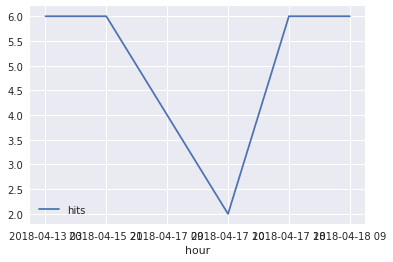

In [96]:
top5 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data16_13TeV:DAOD_HIGG3D1.12848366._000001.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top5.plot(x='hour', y='hits')

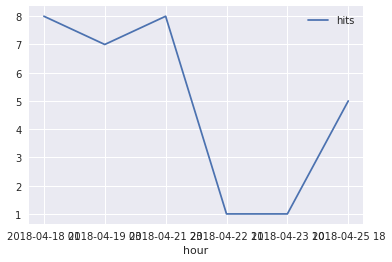

In [97]:
top6 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data17_13TeV:data17_13TeV.00339435.physics_Main.merge.NTUP_L1RPC.f904_m1916_c1195_m1933._0009.1' \
            ORDER BY hour ASC").toPandas()
top6.plot(x='hour', y='hits')

In [98]:
top7 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data16_13TeV:DAOD_HIGG3D1.12848366._000020.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top7.plot(x='hour', y='hits')

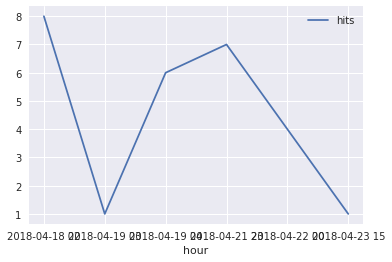

In [99]:
top8 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data17_13TeV:data17_13TeV.00339590.physics_Main.merge.NTUP_L1RPC.f889_m1906_c1195_m1933._0002.1' \
            ORDER BY hour ASC").toPandas()
top8.plot(x='hour', y='hits')

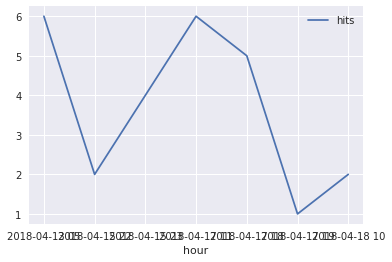

In [100]:
top9 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data16_13TeV:DAOD_HIGG3D1.12848366._000016.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top9.plot(x='hour', y='hits')

In [101]:
spark.sql("SELECT hits, COUNT(*)\
            FROM time_series \
            GROUP BY hits\
            ORDER BY hits ASC").toPandas()

hits  count(1)
0   1     541829  
1   2     35091   
2   3     21422   
3   4     4953    
4   5     3009    
5   6     4350    
6   7     3007    
7   8     631     
8   9     430     
9   10    134     
10  11    9       
11  12    357     
12  13    1       
13  14    25      
14  15    1       
15  16    1       
16  17    11      
17  18    109     
18  19    2       
19  20    22      
20  21    40      
21  23    1       
22  27    3       
23  28    1       
24  36    4       
25  37    5       
26  40    1